In [228]:
import pandas as pd

# Load the dataset (Kaggle automatically mounts it under /kaggle/input/)
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Display dataset overview
print("✅ First 5 rows:")
display(df.head())

print("\n✅ Dataset Info:")
df.info()

print("\n✅ Summary Statistics:")
display(df.describe())

print("\n✅ Churn Distribution:")
print(df['Churn'].value_counts(normalize=True))


✅ First 5 rows:


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes



✅ Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 no

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000



✅ Churn Distribution:
Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


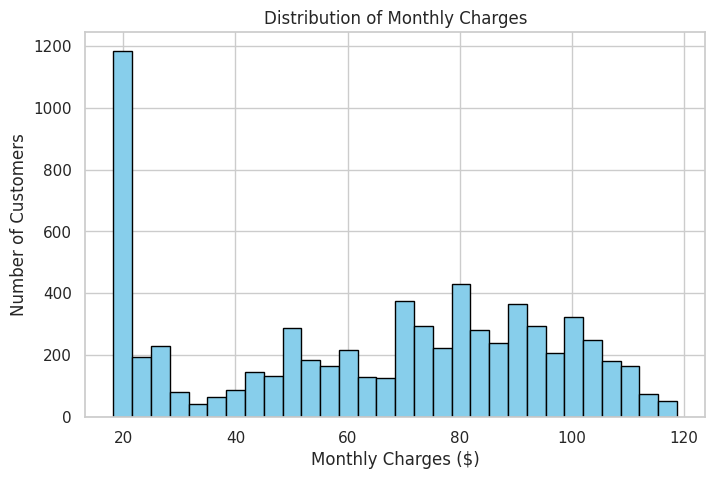

In [229]:
import matplotlib.pyplot as plt

plt.hist(df['MonthlyCharges'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Monthly Charges')
plt.xlabel('Monthly Charges ($)')
plt.ylabel('Number of Customers')
plt.show()


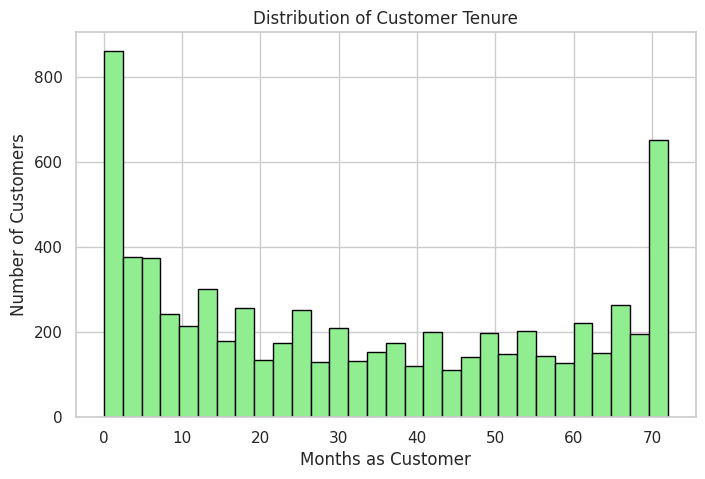

In [230]:
plt.hist(df['tenure'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Distribution of Customer Tenure')
plt.xlabel('Months as Customer')
plt.ylabel('Number of Customers')
plt.show()


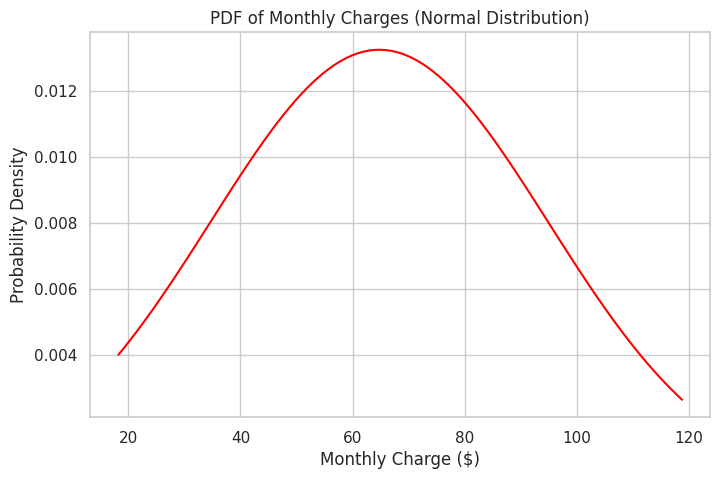

In [231]:
from scipy import stats
import numpy as np

x = np.linspace(df['MonthlyCharges'].min(), df['MonthlyCharges'].max(), 100)
mean = df['MonthlyCharges'].mean()
std = df['MonthlyCharges'].std()
pdf = stats.norm.pdf(x, mean, std)

plt.plot(x, pdf, color='red')
plt.title("PDF of Monthly Charges (Normal Distribution)")
plt.xlabel("Monthly Charge ($)")
plt.ylabel("Probability Density")
plt.show()


In [232]:
# 1. Overall churn rate
overall_churn = df['Churn'].value_counts(normalize=True)['Yes']
print("Overall churn rate:", round(overall_churn*100,2), "%")

# 2. Churn by InternetService (aggregated)
churn_by_service = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
print("\nChurn rate by Internet Service (overall):")
print(churn_by_service)

# 3. Churn by InternetService AND ContractType (subgroups)
churn_by_service_contract = df.groupby(['InternetService','Contract'])['Churn'].value_counts(normalize=True).unstack()['Yes'] * 100
print("\nChurn rate by Internet Service and Contract type:")
print(churn_by_service_contract)


Overall churn rate: 26.54 %

Churn rate by Internet Service (overall):
InternetService
DSL            18.959108
Fiber optic    41.892765
No              7.404980
Name: Yes, dtype: float64

Churn rate by Internet Service and Contract type:
InternetService  Contract      
DSL              Month-to-month    32.215863
                 One year           9.298246
                 Two year           1.910828
Fiber optic      Month-to-month    54.605263
                 One year          19.294991
                 Two year           7.226107
No               Month-to-month    18.893130
                 One year           2.472527
                 Two year           0.783699
Name: Yes, dtype: float64


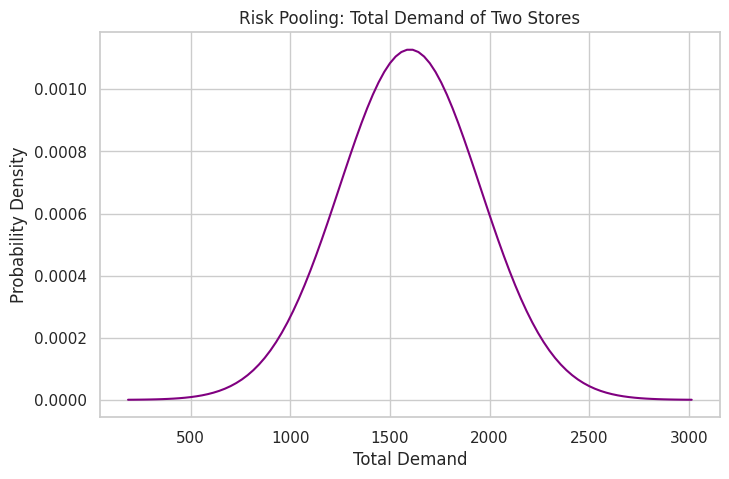

Total Mean Demand = 1600
Total Standard Deviation = 353.55


In [233]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Each store's demand
mean_store = 800
sd_store = 250

# Total for two stores (risk pooling)
mean_total = 2 * mean_store
sd_total = np.sqrt(2) * sd_store

# Generate range
x = np.linspace(mean_total - 4*sd_total, mean_total + 4*sd_total, 100)
pdf = norm.pdf(x, mean_total, sd_total)

# Plot
plt.plot(x, pdf, color='purple')
plt.title("Risk Pooling: Total Demand of Two Stores")
plt.xlabel("Total Demand")
plt.ylabel("Probability Density")
plt.show()

print(f"Total Mean Demand = {mean_total}")
print(f"Total Standard Deviation = {sd_total:.2f}")


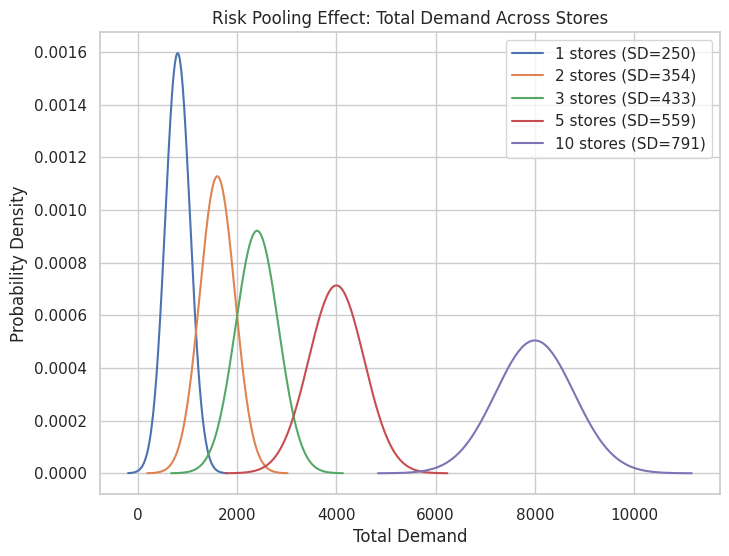

In [234]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Base values per store
mean_store = 800
sd_store = 250

# Try for different numbers of stores
store_counts = [1, 2, 3, 5, 10]

plt.figure(figsize=(8,6))

for n in store_counts:
    mean_total = n * mean_store
    sd_total = np.sqrt(n) * sd_store
    
    x = np.linspace(mean_total - 4*sd_total, mean_total + 4*sd_total, 200)
    pdf = norm.pdf(x, mean_total, sd_total)
    
    plt.plot(x, pdf, label=f"{n} stores (SD={sd_total:.0f})")

plt.title("Risk Pooling Effect: Total Demand Across Stores")
plt.xlabel("Total Demand")
plt.ylabel("Probability Density")
plt.legend()
plt.show()


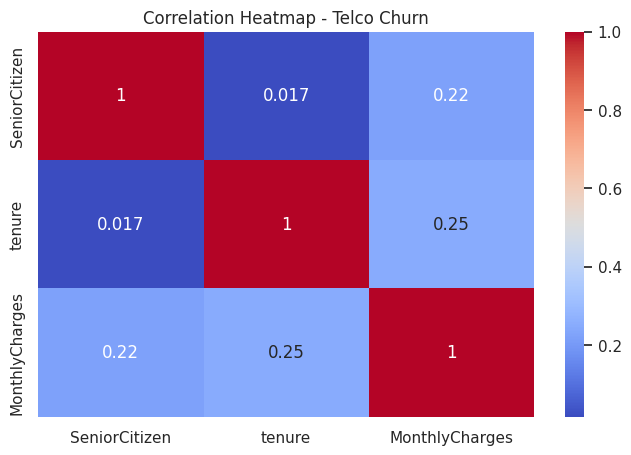

In [235]:

import pandas as pd
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap - Telco Churn")
plt.show()


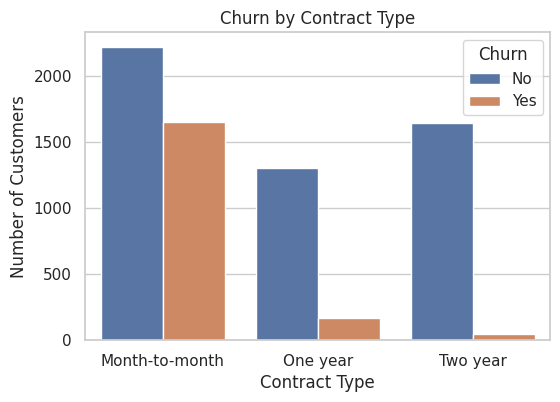

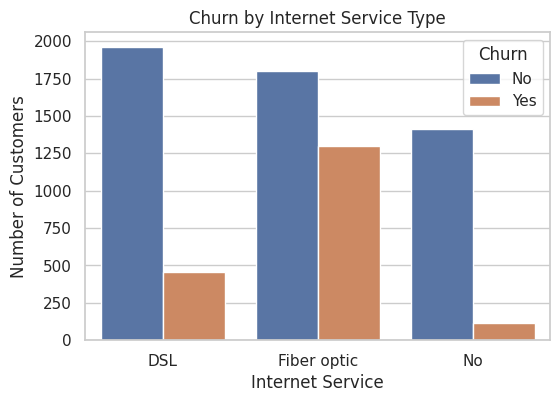

In [236]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compare churn rates by contract type
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title('Churn by Contract Type')
plt.xlabel('Contract Type')
plt.ylabel('Number of Customers')
plt.show()

# Compare churn rates by internet service type
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='InternetService', hue='Churn')
plt.title('Churn by Internet Service Type')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.show()


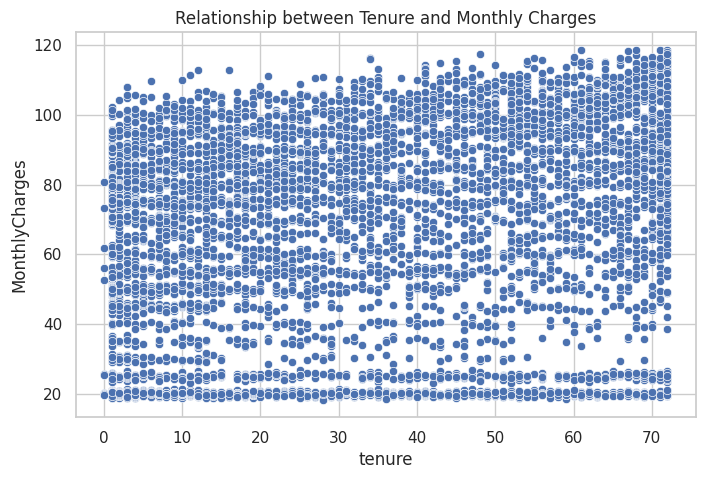

In [237]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x='tenure', y='MonthlyCharges', data=df)
plt.title("Relationship between Tenure and Monthly Charges")
plt.show()


In [238]:
import pandas as pd

# Load dataset
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Convert columns to numeric just in case
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')

# Drop missing values
df = df.dropna(subset=['MonthlyCharges', 'tenure'])

# Calculate covariance
covariance = df['MonthlyCharges'].cov(df['tenure'])

# Calculate correlation
correlation = df['MonthlyCharges'].corr(df['tenure'])

# Display results
print("Covariance:", covariance)
print("Correlation:", correlation)


Covariance: 183.19698749048473
Correlation: 0.2478998562861499


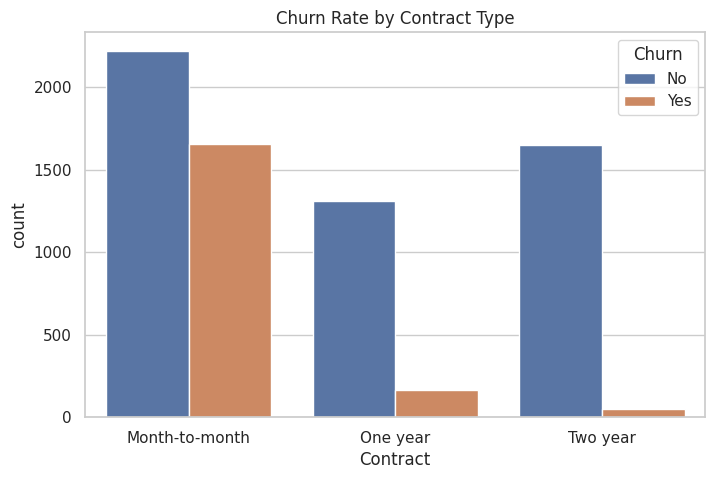

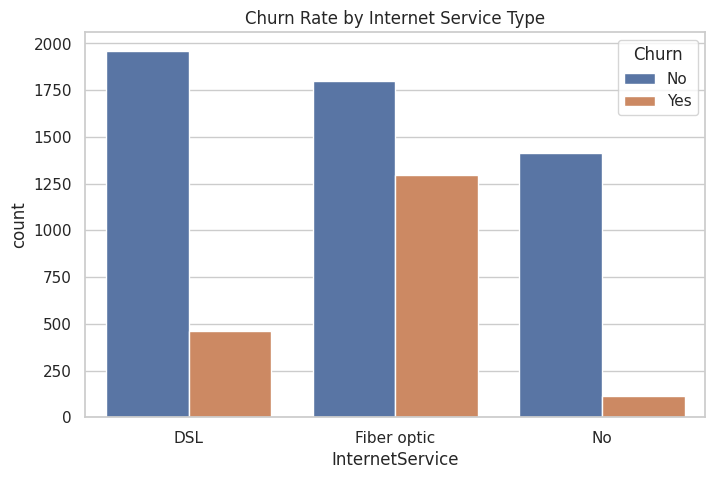

In [239]:
# Churn vs Contract Type
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title("Churn Rate by Contract Type")
plt.show()

# Churn vs Internet Service
sns.countplot(x='InternetService', hue='Churn', data=df)
plt.title("Churn Rate by Internet Service Type")
plt.show()


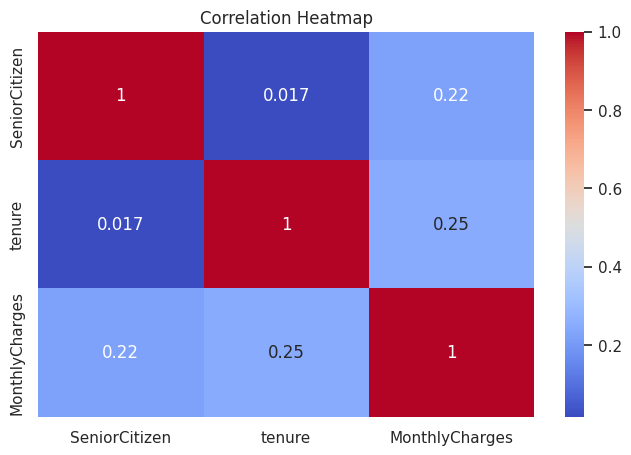

In [240]:
df_num = df.select_dtypes(include=['float64', 'int64'])
corr = df_num.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


🔹 Original Data (first 5 rows):


,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65



🔹 After Min-Max Normalization:


,tenure,MonthlyCharges,TotalCharges
0,0.013889,0.115423,0.001275
1,0.472222,0.385075,0.215867
2,0.027778,0.354229,0.010310
3,0.625000,0.239303,0.210241
4,0.027778,0.521891,0.015330



🔹 After Standardization:


,tenure,MonthlyCharges,TotalCharges
0,-1.277445,-1.160323,-0.994971
1,0.066327,-0.259629,-0.173876
2,-1.236724,-0.362660,-0.960399
3,0.514251,-0.746535,-0.195400
4,-1.236724,0.197365,-0.941193


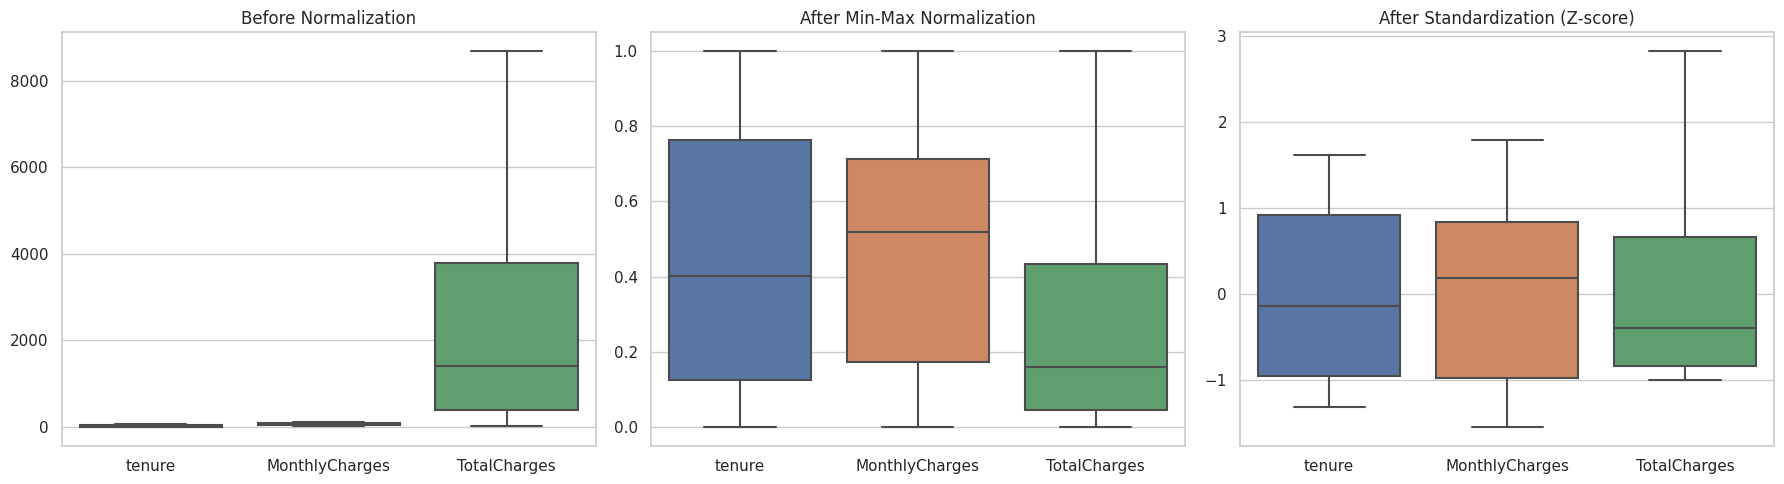

In [241]:
# 📦 Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# ✅ Load your dataset (already available in Kaggle environment)
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# ✅ Select numeric columns for normalization
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# ⚠️ Convert 'TotalCharges' to numeric (some rows may have spaces or errors)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill any missing numeric values with column mean
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# ✅ Min-Max Normalization
minmax_scaler = MinMaxScaler()
df_minmax = df.copy()
df_minmax[numeric_cols] = minmax_scaler.fit_transform(df[numeric_cols])

# ✅ Standardization (Z-score Normalization)
standard_scaler = StandardScaler()
df_standard = df.copy()
df_standard[numeric_cols] = standard_scaler.fit_transform(df[numeric_cols])

# ✅ Display sample results
print("🔹 Original Data (first 5 rows):")
display(df[numeric_cols].head())

print("\n🔹 After Min-Max Normalization:")
display(df_minmax[numeric_cols].head())

print("\n🔹 After Standardization:")
display(df_standard[numeric_cols].head())

# 📊 Visualization: Before vs After Normalization
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.boxplot(data=df[numeric_cols], ax=axes[0])
axes[0].set_title('Before Normalization')

sns.boxplot(data=df_minmax[numeric_cols], ax=axes[1])
axes[1].set_title('After Min-Max Normalization')

sns.boxplot(data=df_standard[numeric_cols], ax=axes[2])
axes[2].set_title('After Standardization (Z-score)')

plt.tight_layout()
plt.show()


,Cluster,customers,churn_rate,tenure_avg,monthly_avg,total_avg
0,1,1345,0.165056,61.834201,99.319294,6136.959963
1,2,1846,0.228602,41.295775,76.363299,2976.934940
2,3,2008,0.500996,8.211653,69.270045,557.476321
3,4,1844,0.118764,28.254881,23.032131,657.396693


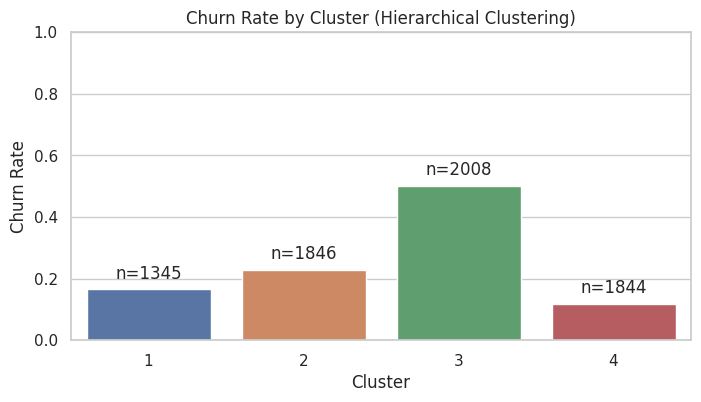

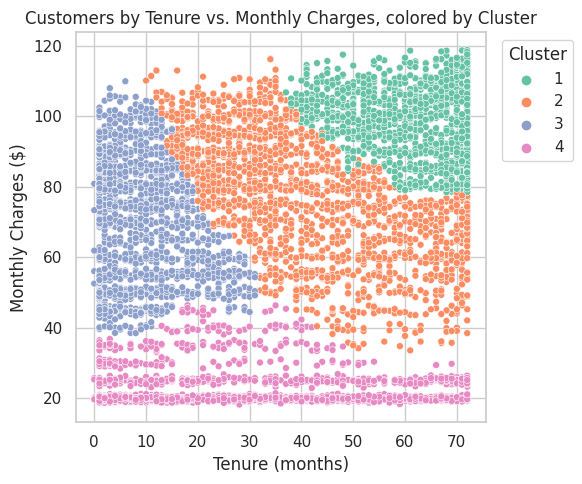

In [242]:
# 🔎 Churn rate per hierarchical cluster (Kaggle-ready)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster

# --- 0) Clean columns we’ll use
df = df.copy()
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')  # handle blanks
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Keep only rows where we have all needed info
work = df[numeric_cols + ['Churn']].dropna().copy()

# --- 1) Scale numeric data (so each feature has equal say)
scaler = StandardScaler()
X = scaler.fit_transform(work[numeric_cols])

# --- 2) Hierarchical clustering (Ward) → choose how many clusters
N_CLUSTERS = 4
Z = linkage(X, method='ward')
clusters = fcluster(Z, t=N_CLUSTERS, criterion='maxclust')
work['Cluster'] = clusters

# --- 3) Compute churn rate per cluster
# Map Yes/No → 1/0 for averaging
work['ChurnFlag'] = (work['Churn'].str.strip().str.lower() == 'yes').astype(int)

cluster_summary = (
    work.groupby('Cluster')
        .agg(
            customers=('ChurnFlag', 'size'),
            churn_rate=('ChurnFlag', 'mean'),
            tenure_avg=('tenure', 'mean'),
            monthly_avg=('MonthlyCharges', 'mean'),
            total_avg=('TotalCharges', 'mean'),
        )
        .sort_values('Cluster')
        .reset_index()
)

display(cluster_summary)

# --- 4) Bar chart: churn rate per cluster (with counts on bars)
plt.figure(figsize=(8,4))
ax = sns.barplot(data=cluster_summary, x='Cluster', y='churn_rate')
ax.set_title('Churn Rate by Cluster (Hierarchical Clustering)')
ax.set_ylabel('Churn Rate')
ax.set_xlabel('Cluster')

# annotate counts
for p, n in zip(ax.patches, cluster_summary['customers']):
    ax.annotate(f'n={n}', (p.get_x()+p.get_width()/2, p.get_height()),
                ha='center', va='bottom', xytext=(0,5), textcoords='offset points')
plt.ylim(0, 1)
plt.show()

# --- 5) (Optional) Quick 2D view of clusters
plt.figure(figsize=(6,5))
sns.scatterplot(x=work['tenure'], y=work['MonthlyCharges'], hue=work['Cluster'], palette='Set2', s=25)
plt.title('Customers by Tenure vs. Monthly Charges, colored by Cluster')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges ($)')
plt.legend(title='Cluster', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()


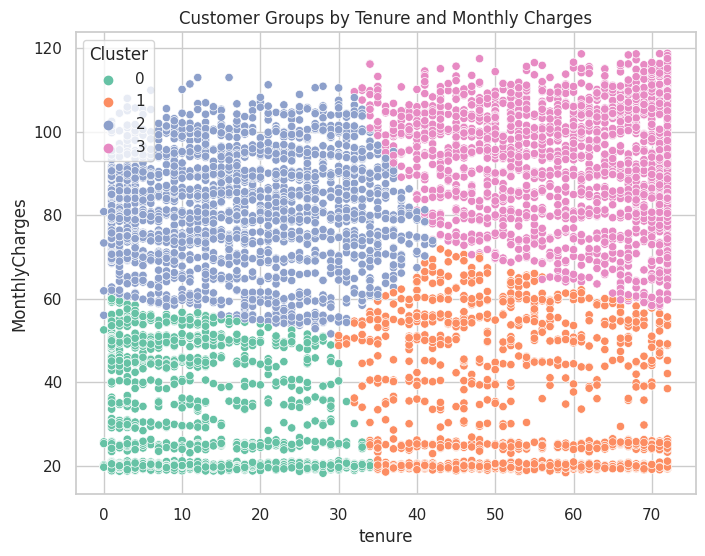

In [243]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Pick numeric columns
X = df[['tenure', 'MonthlyCharges', 'TotalCharges']].copy()
X = X.dropna()

# Normalize (scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

#kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize
plt.figure(figsize=(8,6))
sns.scatterplot(x='tenure', y='MonthlyCharges', hue='Cluster', data=df, palette='Set2')
plt.title('Customer Groups by Tenure and Monthly Charges')
plt.show()


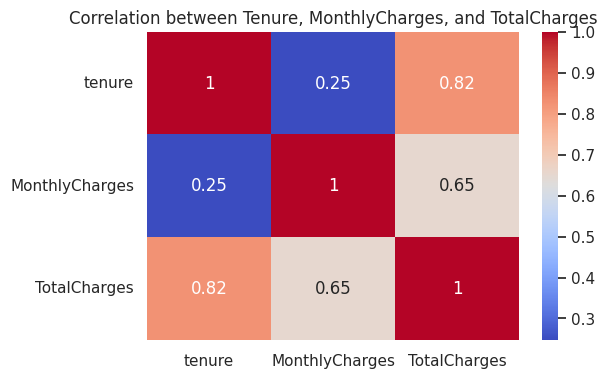

In [244]:
# Check correlation between numeric columns
correlation_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges']].corr()

# Show heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation between Tenure, MonthlyCharges, and TotalCharges")
plt.show()


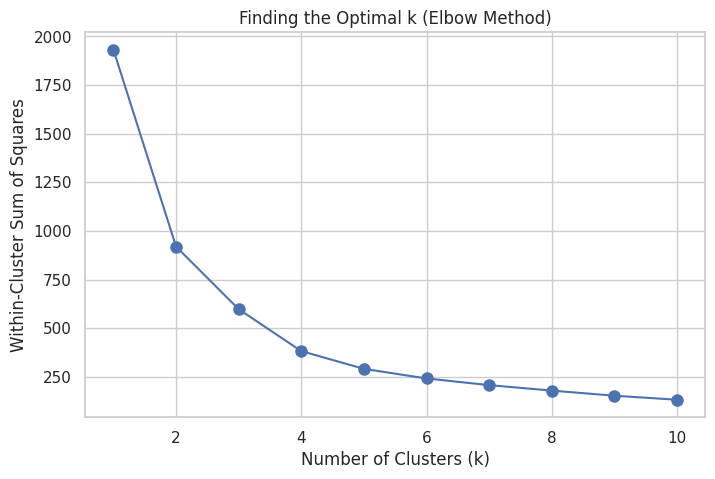

In [245]:
# Step 1: Import packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Step 2: Normalize numeric columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Step 3: Choose features for clustering
X = df_scaled[numeric_cols]

# Step 4: Find the optimal number of clusters (k)
inertia = []  # list to store within-cluster sum of squares (WSS)
K = range(1, 11)  # trying k from 1 to 10

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Step 5: Plot the Elbow Curve
plt.figure(figsize=(8,5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.title('Finding the Optimal k (Elbow Method)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares')
plt.grid(True)
plt.show()


✅ Scaled features shape: (7032, 3)


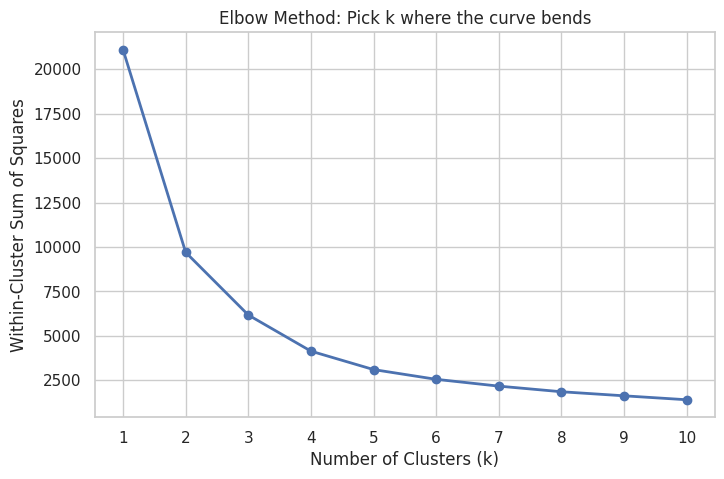

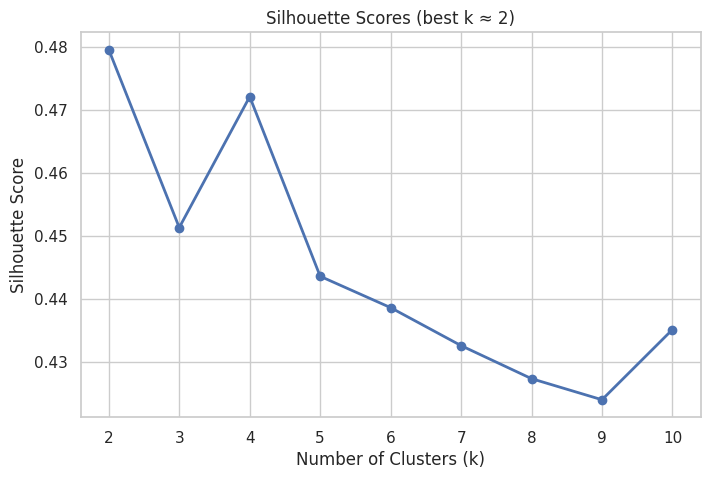

📌 Suggested k from silhouette: 2


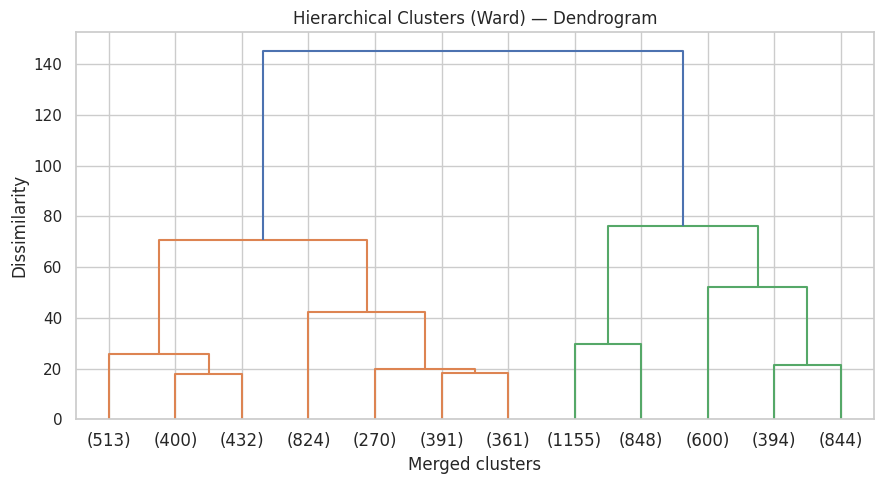

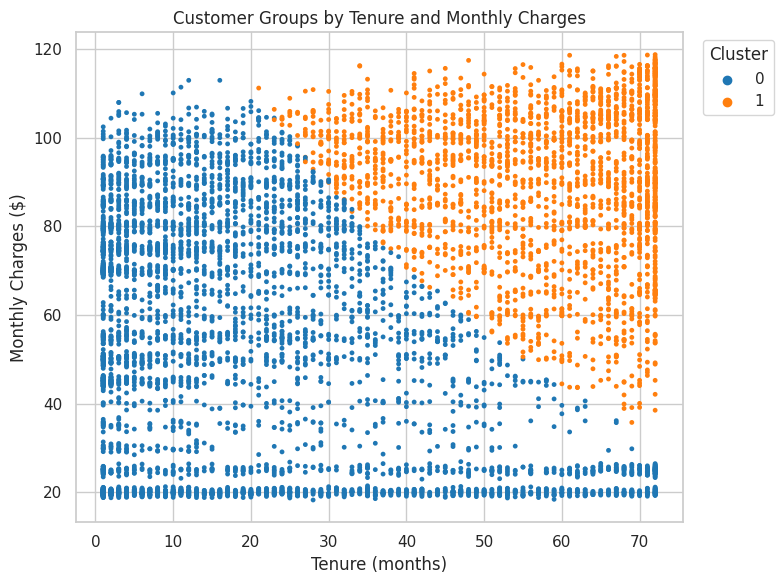

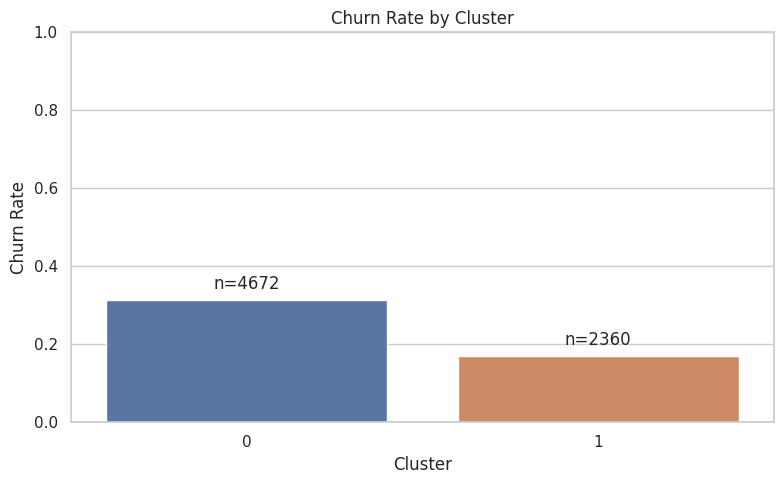

,Cluster,churn_rate,n
0,0,0.314640,4672
1,1,0.169068,2360


In [246]:
# --- 0) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage, dendrogram

sns.set(style="whitegrid", rc={"figure.figsize": (8,5)})

# --- 1) Load & clean (Kaggle auto-mounts input datasets under /kaggle/input)
PATH = "/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(PATH)

# Make TotalCharges numeric and drop rows that turned NaN
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna(subset=["TotalCharges"]).reset_index(drop=True)

# --- 2) Select features and SCALE (normalize)
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
X = df[numeric_cols].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Scaled features shape:", X_scaled.shape)

# --- 3) Elbow curve (within-cluster sum of squares / inertia)
inertia = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42, n_init=10)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.figure()
plt.plot(K, inertia, "o-", linewidth=2)
plt.title("Elbow Method: Pick k where the curve bends")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Within-Cluster Sum of Squares")
plt.xticks(K)
plt.show()

# --- 4) Silhouette scores (higher is better) to confirm k
sil_scores = []
Ks_sil = range(2, 11)
for k in Ks_sil:
    km = KMeans(n_clusters=k, random_state=42, n_init=10).fit(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, km.labels_))

best_k = Ks_sil[int(np.argmax(sil_scores))]
plt.figure()
plt.plot(Ks_sil, sil_scores, "o-", linewidth=2)
plt.title(f"Silhouette Scores (best k ≈ {best_k})")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(Ks_sil)
plt.show()

print(f"📌 Suggested k from silhouette: {best_k}")

# --- 5) Dendrogram (hierarchical clustering)
# Ward linkage works nicely with Euclidean distance on scaled data
Z = linkage(X_scaled, method="ward")

plt.figure(figsize=(9,5))
dendrogram(
    Z,
    truncate_mode="lastp",  # compress tree to the last p merges so it fits on screen
    p=12,
    show_leaf_counts=True,
    leaf_rotation=0,
)
plt.title("Hierarchical Clusters (Ward) — Dendrogram")
plt.ylabel("Dissimilarity")
plt.xlabel("Merged clusters")
plt.tight_layout()
plt.show()

# --- 6) Fit final KMeans using best_k (or set a number you want, e.g., 4)
k_final = best_k
km_final = KMeans(n_clusters=k_final, random_state=42, n_init=10)
df["Cluster"] = km_final.fit_predict(X_scaled)

# --- 7) Visuals for presentation

# 7a) Scatter: Tenure vs MonthlyCharges colored by Cluster
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, x="tenure", y="MonthlyCharges",
    hue="Cluster", palette="tab10", s=12, linewidth=0
)
plt.title("Customer Groups by Tenure and Monthly Charges")
plt.xlabel("Tenure (months)")
plt.ylabel("Monthly Charges ($)")
plt.legend(title="Cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
plt.tight_layout()
plt.show()

# 7b) Churn rate by cluster + counts
df["ChurnFlag"] = (df["Churn"] == "Yes").astype(int)
cluster_stats = (
    df.groupby("Cluster")["ChurnFlag"]
      .agg(churn_rate="mean", n="size")
      .reset_index()
      .sort_values("Cluster")
)

plt.figure(figsize=(8,5))
ax = sns.barplot(data=cluster_stats, x="Cluster", y="churn_rate")
plt.title("Churn Rate by Cluster")
plt.ylabel("Churn Rate")
plt.xlabel("Cluster")
# annotate bars with n
for p, n in zip(ax.patches, cluster_stats["n"]):
    ax.annotate(f"n={n}", (p.get_x()+p.get_width()/2, p.get_height()),
                ha="center", va="bottom", xytext=(0,5), textcoords="offset points")
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

cluster_stats


Scaled features shape: (7032, 3)


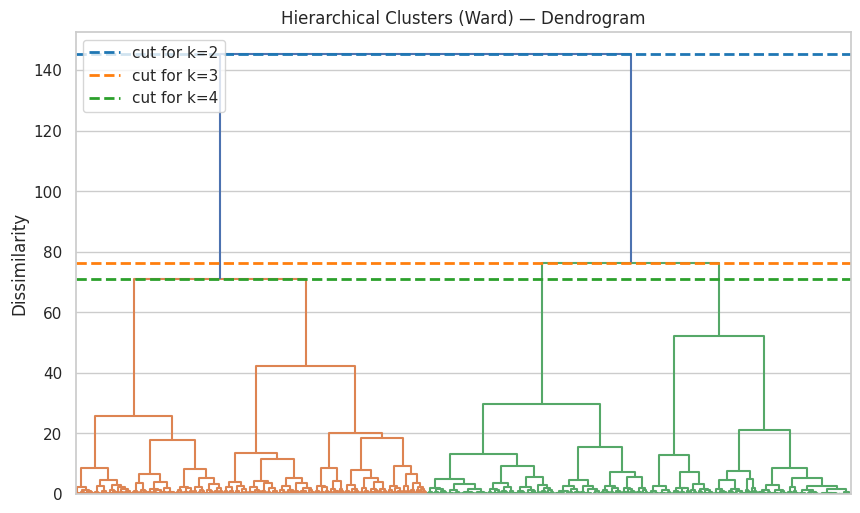


Cluster sizes for k=2:
1    3191
2    3841
Name: count, dtype: int64

Cluster sizes for k=3:
1    3191
2    2003
3    1838
Name: count, dtype: int64

Cluster sizes for k=4:
1    1345
2    1846
3    2003
4    1838
Name: count, dtype: int64


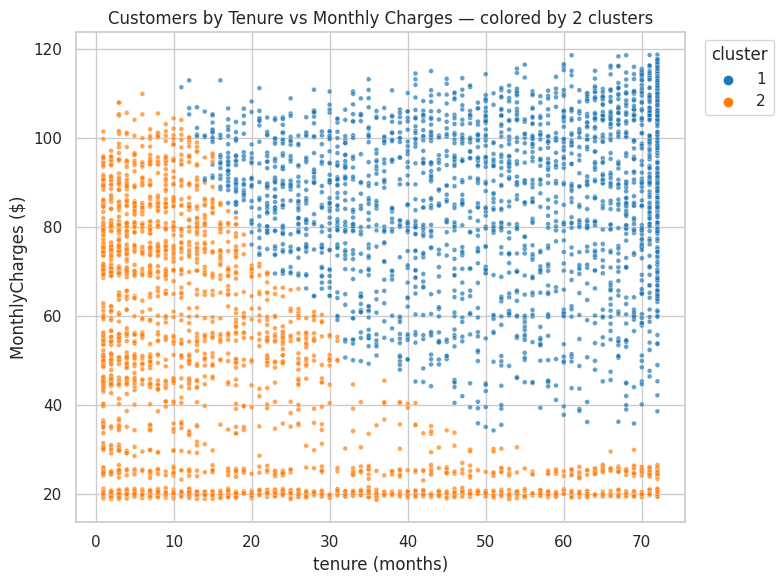

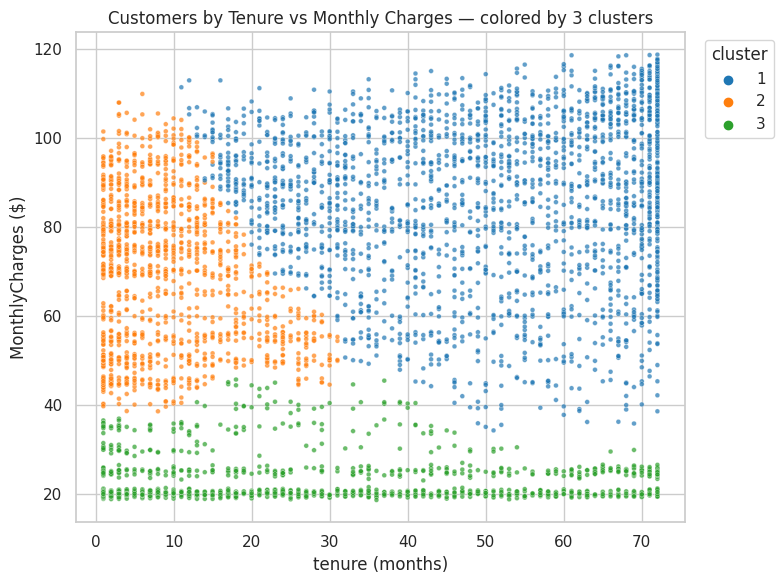

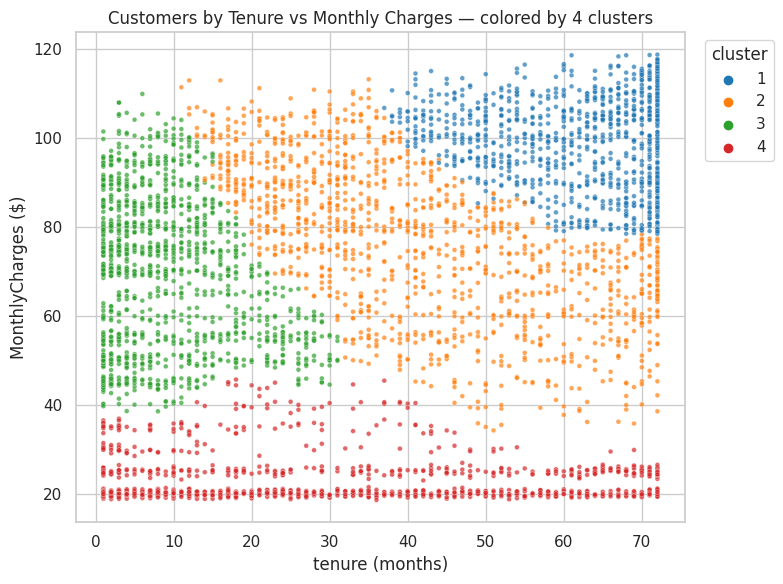


Churn summary by cluster (k=2):


,n,churn_rate
cluster_k2,,
1,3191,0.201818
2,3841,0.318927


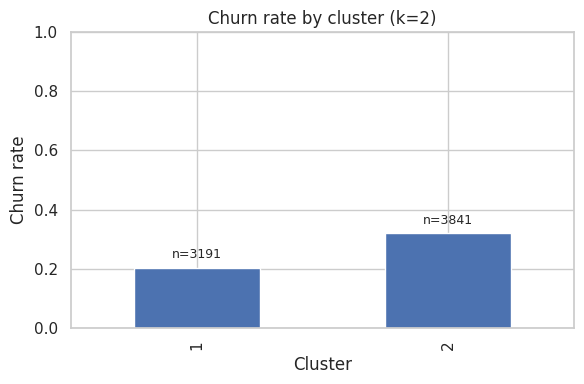


Churn summary by cluster (k=3):


,n,churn_rate
cluster_k3,,
1,3191,0.201818
2,2003,0.502247
3,1838,0.119151


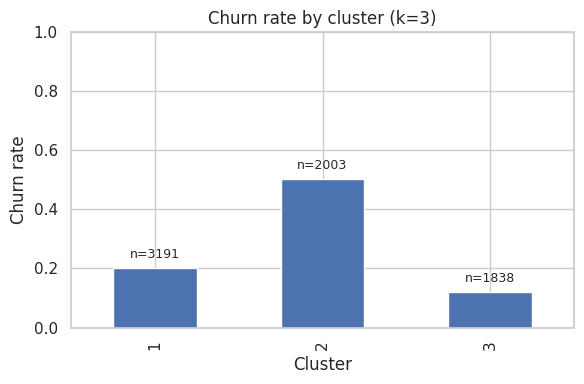


Churn summary by cluster (k=4):


,n,churn_rate
cluster_k4,,
1,1345,0.165056
2,1846,0.228602
3,2003,0.502247
4,1838,0.119151


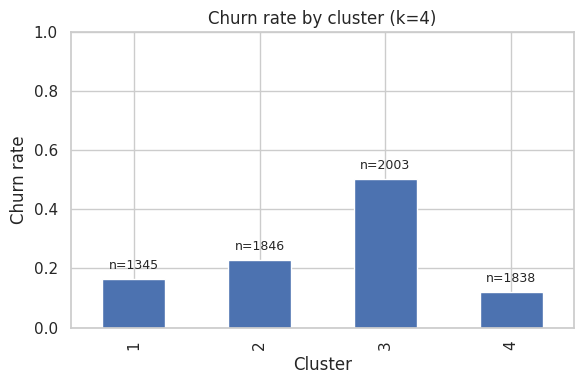

In [247]:
# --- 0) Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

sns.set(style="whitegrid", rc={"figure.figsize": (8,5)})

# --- 1) Load Telco dataset (Kaggle auto-mounts it here)
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Clean TotalCharges (it is read as text in this dataset)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df = df.dropna(subset=["TotalCharges"]).reset_index(drop=True)

# --- 2) Pick a few numeric features and standardize (= make fair like making crayons same length)
numeric_cols = ["tenure", "MonthlyCharges", "TotalCharges"]
X = df[numeric_cols].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled features shape:", X_scaled.shape)

# --- 3) Build the hierarchical tree (Ward linkage = groups by minimizing variance)
Z = linkage(X_scaled, method="ward")

# Helper: find the y-height where the tree has k clusters (for drawing the cut lines)
def height_for_k(Z, k):
    """
    For a dendrogram built on n points, there are (n-1) merges in Z.
    The merge distances are Z[:, 2] (ascending-ish).
    The height right before going from k to (k-1) clusters is Z[-(k-1), 2].
    We'll draw a line a tiny bit below that height so we still have k clusters.
    """
    idx = -(k-1)  # e.g., k=2 -> -1 (last merge)
    h = Z[idx, 2] - 1e-3
    return max(h, 0.0)

# --- 4) Plot dendrogram + show cuts for k=2,3,4  ------------------------------------
plt.figure(figsize=(10,6))
dendrogram(Z, no_labels=True, color_threshold=None)
plt.title("Hierarchical Clusters (Ward) — Dendrogram")
plt.ylabel("Dissimilarity")

for k, c in zip([2,3,4], ["tab:blue","tab:orange","tab:green"]):
    h = height_for_k(Z, k)
    plt.axhline(y=h, ls="--", lw=2, color=c, label=f"cut for k={k}")
plt.legend(loc="upper left")
plt.show()

# --- 5) Make actual cluster labels for k = 2, 3, 4 (like coloring students by class)
results = {}
for k in [2,3,4]:
    labels = fcluster(Z, t=k, criterion="maxclust")   # 1..k
    results[k] = labels

# --- 6) Quick look: how many in each cluster?
for k in [2,3,4]:
    counts = pd.Series(results[k]).value_counts().sort_index()
    print(f"\nCluster sizes for k={k}:\n{counts}")

# --- 7) Simple 2D scatter (tenure vs. MonthlyCharges) colored by clusters
# (This is just a window into 2 of the 3 features, so it's an illustration.)
def plot_scatter_by_k(k):
    plt.figure(figsize=(8,6))
    tmp = df.copy()
    tmp[f"cluster_k{k}"] = results[k]
    sns.scatterplot(
        data=tmp.sample(min(5000, len(tmp)), random_state=42),  # sample for speed
        x="tenure", y="MonthlyCharges",
        hue=f"cluster_k{k}", palette="tab10", s=12, alpha=0.7
    )
    plt.title(f"Customers by Tenure vs Monthly Charges — colored by {k} clusters")
    plt.xlabel("tenure (months)")
    plt.ylabel("MonthlyCharges ($)")
    plt.legend(title="cluster", bbox_to_anchor=(1.02, 1), loc="upper left")
    plt.tight_layout()
    plt.show()

plot_scatter_by_k(2)
plot_scatter_by_k(3)
plot_scatter_by_k(4)

# --- 8) (Optional) If you want churn rates per cluster (business meaning!)
if "Churn" in df.columns:
    for k in [2,3,4]:
        tmp = df.copy()
        tmp[f"cluster_k{k}"] = results[k]
        # turn Churn Yes/No into 1/0
        tmp["churn_flag"] = (tmp["Churn"] == "Yes").astype(int)
        churn_by_cluster = tmp.groupby(f"cluster_k{k}")["churn_flag"].mean().rename("churn_rate")
        size_by_cluster  = tmp.groupby(f"cluster_k{k}")["churn_flag"].size().rename("n")
        summary = pd.concat([size_by_cluster, churn_by_cluster], axis=1)
        print(f"\nChurn summary by cluster (k={k}):")
        display(summary)

        ax = churn_by_cluster.plot(kind="bar", figsize=(6,4))
        for p, n in zip(ax.patches, size_by_cluster.values):
            ax.annotate(f"n={n}", (p.get_x()+p.get_width()/2, p.get_height()),
                        ha="center", va="bottom", fontsize=9, rotation=0, xytext=(0,5), textcoords="offset points")
        plt.title(f"Churn rate by cluster (k={k})")
        plt.ylabel("Churn rate")
        plt.xlabel("Cluster")
        plt.ylim(0, 1)
        plt.tight_layout()
        plt.show()


In [248]:
# === 0) Imports
import os, glob, textwrap
import numpy as np
import pandas as pd
import statsmodels.api as sm

# === 1) Find & read the CSV (works with either filename on Kaggle)
candidates = glob.glob("/kaggle/input/**/WA_Fn-UseC_-Telco-Customer-Churn*.csv", recursive=True)
if not candidates:
    candidates = glob.glob("/kaggle/input/**/Telco-Customer-Churn*.csv", recursive=True)
if not candidates:
    raise FileNotFoundError("Couldn't find the Telco CSV under /kaggle/input/. Open the left sidebar ▸ Input to confirm the exact file name.")

csv_path = candidates[0]
print(f"✅ Using file: {csv_path}")

df = pd.read_csv(csv_path)

# === 2) Light cleaning (convert TotalCharges to numeric, drop empties)
# In this dataset TotalCharges sometimes is blank -> coerce to NaN then drop
if "TotalCharges" in df.columns:
    df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")

df = df.dropna(subset=["TotalCharges"]).copy()

# === 3) Choose a regression target and features
# We'll predict MonthlyCharges (a number) from a few business-feel features.
target = "MonthlyCharges"

# Numeric features we can use directly
num_feats = ["tenure", "TotalCharges", "SeniorCitizen"]

# Helpful Yes/No flags to turn into 0/1:
yn_feats = ["Partner", "Dependents", "PaperlessBilling"]

# Categorical to one-hot (kept small so the table is readable)
cat_feats = ["Contract", "InternetService"]

# --- build design matrix X
X = df[num_feats].copy()

# Map Yes/No -> 1/0 for selected flags if present
for col in yn_feats:
    if col in df.columns:
        X[col] = (df[col] == "Yes").astype(int)

# One-hot encode a couple of categorical variables (drop the first to avoid multicollinearity)
X = pd.concat([X, pd.get_dummies(df[cat_feats], drop_first=True)], axis=1)

# Drop any columns that ended up non-numeric for safety
X = X.select_dtypes(include=[np.number])

# Add intercept term
X = sm.add_constant(X)

# y target
y = df[target].astype(float)

print("🧱 Design matrix shape:", X.shape)
print("🎯 Target:", target)

# === 4) Fit OLS (this produces the big stats table with coef, p-values, CI, etc.)
model = sm.OLS(y, X).fit()
print("\n" + "="*80)
print("OLS Regression Results".center(80))
print("="*80)
print(model.summary())  # ← this is the table like in your MIT quiz screenshot

# === 5) Correlation matrix (like the lower table in your screenshot)
# We'll show correlations among a compact set of numeric columns
corr_cols = ["MonthlyCharges", "tenure", "TotalCharges", "SeniorCitizen"]
for col in ["Partner", "Dependents", "PaperlessBilling"]:
    if col in X.columns:  # these are already 0/1 after our mapping
        corr_cols.append(col)
corr_df = pd.concat([y.rename("MonthlyCharges"), X.drop(columns=["const"])], axis=1)
corr = corr_df[corr_cols].corr().round(3)

print("\n" + "="*80)
print("Correlation Matrix (selected features)".center(80))
print("="*80)
print(corr.to_string())


✅ Using file: /kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv
🧱 Design matrix shape: (7032, 7)
🎯 Target: MonthlyCharges

                             OLS Regression Results                             
                            OLS Regression Results                            
Dep. Variable:         MonthlyCharges   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     2955.
Date:                Sun, 26 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:46:28   Log-Likelihood:                -29486.
No. Observations:                7032   AIC:                         5.899e+04
Df Residuals:                    7025   BIC:                         5.903e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                          

In [249]:
# --- Step 1: Import libraries ---
import pandas as pd
import statsmodels.api as sm

# --- Step 2: Load your dataset (change the filename if needed) ---
df = pd.read_csv('/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

# --- Step 3: Clean and prepare numeric columns ---
# Convert 'TotalCharges' to numeric (some values may be blank)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Drop rows with missing values
df = df.dropna(subset=['TotalCharges'])

# Encode the target variable (Churn: Yes=1, No=0)
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Select numeric predictors
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
X = df[numeric_cols]
y = df['Churn']

# --- Step 4: Add constant for intercept ---
X = sm.add_constant(X)

# --- Step 5: Build the OLS model ---
model = sm.OLS(y, X).fit()

# --- Step 6: Display regression results (like MIT xPRO table) ---
print(model.summary())

# --- Step 7: Correlation Matrix (like quiz display) ---
print("\nCorrelation Matrix:\n")
print(df[['Churn'] + numeric_cols].corr().round(6))


                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       0.225
Model:                            OLS   Adj. R-squared:                  0.224
Method:                 Least Squares   F-statistic:                     678.8
Date:                Sun, 26 Oct 2025   Prob (F-statistic):               0.00
Time:                        00:46:28   Log-Likelihood:                -3338.1
No. Observations:                7032   AIC:                             6684.
Df Residuals:                    7028   BIC:                             6712.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0686      0.018      3.

In [250]:
import warnings, numpy as np, pandas as pd
import statsmodels.api as sm

warnings.filterwarnings("ignore", category=RuntimeWarning)

# Add random column (should not be significant)
np.random.seed(42)
df['random_col'] = np.random.randn(len(df))

# Logistic regression inputs
X = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'random_col']]
X = sm.add_constant(X)
y = df['Churn']   # already numeric (1/0)

# Fit the model
model_random = sm.Logit(y, X).fit(disp=False, maxiter=200)
print(model_random.summary())

# --- Step 8: Confidence Intervals and Significance (95%) ---
res = pd.DataFrame({
    'Coefficient (log-odds)': model_random.params,
    'p-value': model_random.pvalues,
    'Lower 95%': model_random.conf_int()[0],
    'Upper 95%': model_random.conf_int()[1]
})
res['Significant_95%'] = res['p-value'] < 0.05

# Clean NaN or inf values before printing
res = res.replace([np.inf, -np.inf], np.nan).fillna(0)

print("\n=== 95% Confidence Intervals & Significance (Logit) ===")
print(res)

# --- Step 9: Identify variables whose confidence interval crosses zero ---
print("\nVariables crossing zero (NOT significant at 95%):")
cross_zero = res[(res['Lower 95%'] < 0) & (res['Upper 95%'] > 0)]
print(cross_zero)

# --- Step 10: Correlation Matrix ---
corr = df[['Churn','tenure','MonthlyCharges','TotalCharges','random_col']].corr().round(3)
print("\n=== Correlation Matrix ===")
print(corr)

strong_corr = corr[((corr >= 0.65) & (corr < 1)) | ((corr <= -0.65) & (corr > -1))]
print("\n=== Pairs with Strong Correlation (|r| ≥ 0.65) ===")
print(strong_corr.dropna(how="all").dropna(axis=1, how="all"))


                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7027
Method:                           MLE   Df Model:                            4
Date:                Sun, 26 Oct 2025   Pseudo R-squ.:                  0.2172
Time:                        00:46:28   Log-Likelihood:                -3187.4
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -1.6045      0.117    -13.662      0.000      -1.835      -1.374
tenure            -0.0670      0.005    -12.272      0.000      -0.078      -0.056
MonthlyCharges     0.0303      0.002

In [251]:
# === Telco Churn: MIT-style formula models (OLS) ===
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf

# 1) LOAD / PREP
# Adjust path if needed:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Clean numeric columns
# TotalCharges sometimes has blanks -> coerce to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges']).copy()

# Make target numeric (1=Yes churns, 0=No)
df['Churn'] = (df['Churn'] == 'Yes').astype(int)

# Some binary Yes/No features to 0/1
yn_cols = ['Partner','Dependents','PhoneService','PaperlessBilling']
for c in yn_cols:
    if c in df.columns:
        df[c] = (df[c] == 'Yes').astype(int)

# 2) THREE MODELS (MIT formula style)

# Model 1: basic numeric trio (matches your screenshot idea)
m1 = smf.ols('Churn ~ tenure + MonthlyCharges + TotalCharges', data=df).fit()

# Model 2: add a few extra predictors
# - SeniorCitizen is already 0/1 in the dataset
# - PaperlessBilling is now 0/1
# - Contract & InternetService are categoricals -> use C() so statsmodels encodes dummies automatically
m2 = smf.ols('Churn ~ tenure + MonthlyCharges + TotalCharges + SeniorCitizen + PaperlessBilling + C(Contract) + C(InternetService)', data=df).fit()

# Model 3: a “pruned” model:
#   - Keep variables from Model 2 that look important in many runs: tenure, MonthlyCharges, SeniorCitizen,
#     and one-hot versions of Contract & InternetService (via C()).
#   - Drop TotalCharges to reduce multicollinearity with tenure.
m3 = smf.ols('Churn ~ tenure + MonthlyCharges + SeniorCitizen + PaperlessBilling + C(Contract) + C(InternetService)', data=df).fit()

# 3) HELPER to print compact stats
def brief(model, name):
    sig = model.pvalues[model.pvalues < 0.05].index.tolist()
    return {
        "model": name,
        "R2": round(model.rsquared, 4),
        "Adj_R2": round(model.rsquared_adj, 4),
        "n_params": int(model.df_model + 1),  # includes intercept
        "significant_terms(p<0.05)": [t for t in sig if t != "Intercept"]
    }

print("=== Model summaries (compact) ===")
for b in [brief(m1, "Model 1: basic"),
          brief(m2, "Model 2: +Paperless +Contract +InternetService"),
          brief(m3, "Model 3: pruned (drop TotalCharges)")]:
    print(b)

# 4) Full tables (if you want the full MIT-style regression output):
print("\n\n=== FULL SUMMARY: Model 1 ===")
print(m1.summary())

print("\n\n=== FULL SUMMARY: Model 2 ===")
print(m2.summary())

print("\n\n=== FULL SUMMARY: Model 3 ===")
print(m3.summary())

# 5) Quick guidance based on the runs
print("\n\nNOTES:")
print("- Compare R2/Adj_R2: higher means the model explains more churn variance.")
print("- Check p-values in each summary: keep variables with p<0.05; consider dropping those with p>=0.05.")
print("- If you see a LARGE 'Cond. No.' in notes, you likely have multicollinearity (e.g., tenure vs TotalCharges).")
print("- Dropping TotalCharges (since it's highly correlated with tenure) often stabilizes coefficients.")


=== Model summaries (compact) ===
{'model': 'Model 1: basic', 'R2': 0.2247, 'Adj_R2': 0.2243, 'n_params': 4, 'significant_terms(p<0.05)': ['tenure', 'MonthlyCharges', 'TotalCharges']}
{'model': 'Model 2: +Paperless +Contract +InternetService', 'R2': 0.2645, 'Adj_R2': 0.2636, 'n_params': 10, 'significant_terms(p<0.05)': ['C(Contract)[T.One year]', 'C(Contract)[T.Two year]', 'C(InternetService)[T.Fiber optic]', 'C(InternetService)[T.No]', 'tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'PaperlessBilling']}
{'model': 'Model 3: pruned (drop TotalCharges)', 'R2': 0.2564, 'Adj_R2': 0.2556, 'n_params': 9, 'significant_terms(p<0.05)': ['C(Contract)[T.One year]', 'C(Contract)[T.Two year]', 'C(InternetService)[T.Fiber optic]', 'C(InternetService)[T.No]', 'tenure', 'SeniorCitizen', 'PaperlessBilling']}


=== FULL SUMMARY: Model 1 ===
                            OLS Regression Results                            
Dep. Variable:                  Churn   R-squared:                       

Using CSV: /kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


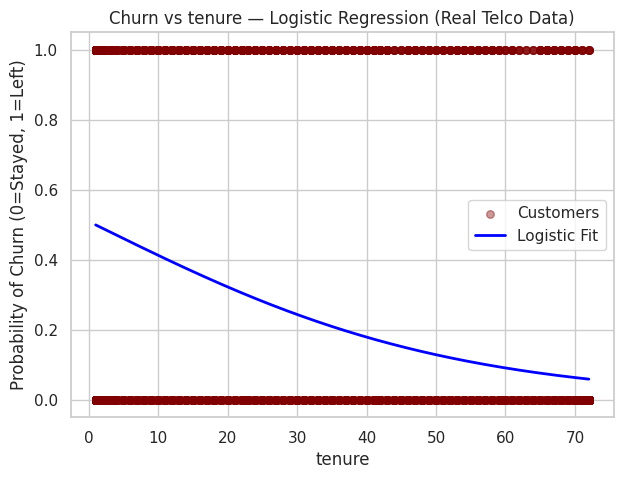


=== Logistic Regression: 95% Confidence Table ===
   Coefficient (log-odds)        p-value  Lower 95%  Upper 95%  \
0                0.037299   3.781293e-01  -0.045647  -0.041771   
1               -0.039010  9.487341e-169   0.120244  -0.036248   

   Significant_95%  
0            False  
1             True  

=== Odds Ratios (exp(coeff)) & 95% CI ===
   Odds Ratio  Lower 95%  Upper 95%
0    1.038003   0.955379   0.959089
1    0.961741   1.127772   0.964401


In [252]:
# =============================
# Telco Churn — robust loader + logistic plot + 95% CI
# =============================
import os, glob, warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

warnings.filterwarnings("ignore")

# 1) Auto-locate the CSV (works no matter what the dataset folder is called)
cands = glob.glob("/kaggle/input/**/WA_Fn-UseC_-Telco-Customer-Churn.csv", recursive=True)
assert len(cands) > 0, "CSV not found under /kaggle/input. Add the dataset in Kaggle (Add data)."
csv_path = cands[0]
print("Using CSV:", csv_path)

# 2) Load with safe encoding fallback
try:
    df = pd.read_csv(csv_path, encoding="utf-8")
except UnicodeDecodeError:
    df = pd.read_csv(csv_path, encoding="latin-1")

# 3) Clean & coerce numerics needed for modeling
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges','tenure','MonthlyCharges']).copy()
df['Churn'] = (df['Churn'] == 'Yes').astype(int)

# ---------- choose predictor to visualize ----------
XCOL = 'tenure'     # try 'MonthlyCharges' as well
# ---------------------------------------------------

# 4) Build logistic regression (single predictor + intercept)
x = df[XCOL].astype(float).values
y = df['Churn'].values
X = sm.add_constant(x)  # intercept

# Some guards: if constant-producing col sneaks in or all values same
assert np.unique(x).size > 1, f"'{XCOL}' has only one unique value after cleaning."

logit_model = sm.Logit(y, X).fit(disp=False, maxiter=500)

# 5) Smooth predictions for plot
x_range = np.linspace(x.min(), x.max(), 200)
X_new = sm.add_constant(x_range)
pred_probs = logit_model.predict(X_new)

# 6) Plot
plt.figure(figsize=(7,5))
plt.scatter(x, y, color='maroon', alpha=0.4, s=30, label='Customers')
plt.plot(x_range, pred_probs, color='blue', linewidth=2, label='Logistic Fit')
plt.title(f"Churn vs {XCOL} — Logistic Regression (Real Telco Data)")
plt.xlabel(XCOL)
plt.ylabel("Probability of Churn (0=Stayed, 1=Left)")
plt.ylim(-0.05, 1.05)
plt.legend()
plt.show()

# 7) Significance table (p-values & 95% CI)
res = pd.DataFrame({
    'Coefficient (log-odds)': logit_model.params,
    'p-value': logit_model.pvalues,
    'Lower 95%': logit_model.conf_int()[0],
    'Upper 95%': logit_model.conf_int()[1]
})
res['Significant_95%'] = res['p-value'] < 0.05
print("\n=== Logistic Regression: 95% Confidence Table ===")
print(res)

# 8) Odds ratios (more intuitive)
or_vals = np.exp(logit_model.params)
or_ci = np.exp(logit_model.conf_int())
print("\n=== Odds Ratios (exp(coeff)) & 95% CI ===")
print(pd.DataFrame({'Odds Ratio': or_vals, 'Lower 95%': or_ci[0], 'Upper 95%': or_ci[1]}))


Using: /kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


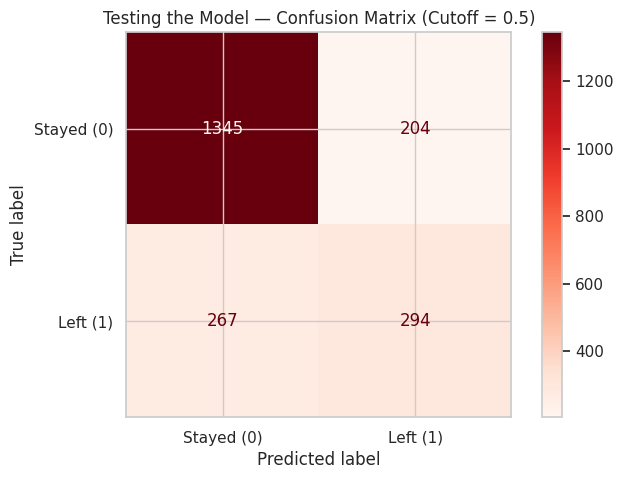

True Negatives: 1345  |  False Positives: 204
False Negatives: 267 |  True Positives: 294
Accuracy: 0.777


In [253]:
# =============================
# Logistic Regression + Confusion Matrix (Telco Churn) — robust path
# =============================
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 1) Auto-locate the Telco CSV under /kaggle/input (folder name can vary)
cands = glob.glob("/kaggle/input/**/WA_Fn-UseC_-Telco-Customer-Churn.csv", recursive=True)
if not cands:
    # fallback: anything with Telco + Churn in name
    cands = glob.glob("/kaggle/input/**/*Telco*Churn*.csv", recursive=True)

assert cands, "CSV not found under /kaggle/input. In Kaggle, click 'Add data' and attach the Telco Churn dataset."
csv_path = cands[0]
print("Using:", csv_path)

# 2) Load + clean
df = pd.read_csv(csv_path)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges']).copy()
df['Churn'] = (df['Churn'] == 'Yes').astype(int)

# Encode a few categoricals
le = LabelEncoder()
df['Contract'] = le.fit_transform(df['Contract'])
df['InternetService'] = le.fit_transform(df['InternetService'])
df['PaperlessBilling'] = (df['PaperlessBilling'] == 'Yes').astype(int)

# 3) Features & target
X = df[['tenure','MonthlyCharges','TotalCharges','SeniorCitizen','PaperlessBilling','Contract','InternetService']]
y = df['Churn']

# 4) Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# 5) Logistic regression
# (liblinear is robust on smaller/imbalanced sets)
model = LogisticRegression(max_iter=1000, solver='liblinear')
model.fit(X_train, y_train)

# 6) Predict probabilities, apply cutoff 0.5
y_prob = model.predict_proba(X_test)[:, 1]
cutoff = 0.5
y_pred = (y_prob >= cutoff).astype(int)

# 7) Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Stayed (0)", "Left (1)"])
disp.plot(cmap="Reds", values_format="d")
plt.title(f"Testing the Model — Confusion Matrix (Cutoff = {cutoff})")
plt.show()

# 8) Quick metrics
tn, fp, fn, tp = cm.ravel()
accuracy = (tp + tn) / np.sum(cm)
print(f"True Negatives: {tn}  |  False Positives: {fp}")
print(f"False Negatives: {fn} |  True Positives: {tp}")
print(f"Accuracy: {accuracy:.3f}")


Using: /kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv
Optimization terminated successfully.
         Current function value: 0.433434
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7026
Method:                           MLE   Df Model:                            5
Date:                Sun, 26 Oct 2025   Pseudo R-squ.:                  0.2514
Time:                        00:46:30   Log-Likelihood:                -3047.9
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Int

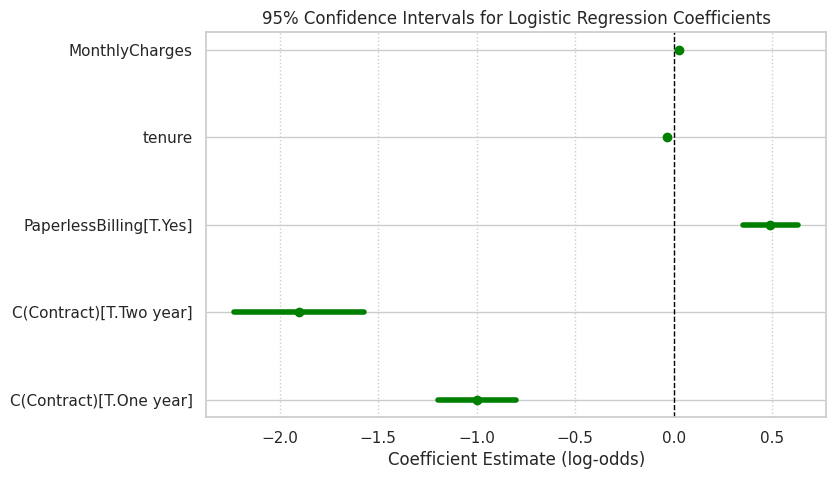

In [254]:
# =============================
# Telco Churn — Confidence Interval Visualization
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 1️⃣ Load your file (auto-find if needed)
import glob, os
cands = glob.glob("/kaggle/input/**/WA_Fn-UseC_-Telco-Customer-Churn.csv", recursive=True)
csv_path = cands[0] if cands else "/kaggle/working/WA_Fn-UseC_-Telco-Customer-Churn.csv"
print("Using:", csv_path)

df = pd.read_csv(csv_path)

# 2️⃣ Clean & prepare
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges']).copy()
df['Churn'] = (df['Churn'] == 'Yes').astype(int)

# 3️⃣ Build logistic model with categorical features (like your MIT-style one)
model = smf.logit('Churn ~ tenure + MonthlyCharges + C(Contract) + PaperlessBilling', data=df).fit()
print(model.summary())

# 4️⃣ Create a table of coefficients + 95% CI
res = pd.DataFrame({
    'coef': model.params,
    'lower_95': model.conf_int()[0],
    'upper_95': model.conf_int()[1],
    'p_value': model.pvalues
})
res['significant'] = res['p_value'] < 0.05
res = res.drop('Intercept', errors='ignore')
print("\n=== Coefficients & 95% Confidence Intervals ===")
print(res)

# 5️⃣ Plot as a horizontal “number line” chart
plt.figure(figsize=(8,5))
plt.axvline(0, color='black', linestyle='--', linewidth=1)
for i, row in res.iterrows():
    color = 'green' if row['significant'] else 'red'
    plt.plot([row['lower_95'], row['upper_95']], [i, i], color=color, lw=4)
    plt.plot(row['coef'], i, 'o', color=color)
plt.yticks(range(len(res)), res.index)
plt.title("95% Confidence Intervals for Logistic Regression Coefficients")
plt.xlabel("Coefficient Estimate (log-odds)")
plt.grid(axis='x', linestyle=':')
plt.show()


Using: /kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv


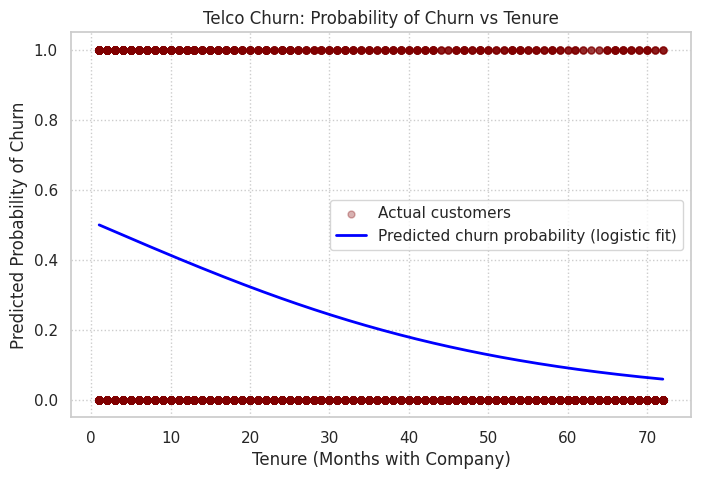

In [255]:
# =============================
# Logistic Curve: Tenure vs Churn (Telco Churn)
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

# 1️⃣ Load the Telco Churn dataset (auto-detect path)
import glob, os
cands = glob.glob("/kaggle/input/**/WA_Fn-UseC_-Telco-Customer-Churn.csv", recursive=True)
csv_path = cands[0] if cands else "/kaggle/working/WA_Fn-UseC_-Telco-Customer-Churn.csv"
print("Using:", csv_path)

df = pd.read_csv(csv_path)

# 2️⃣ Clean the data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df = df.dropna(subset=['TotalCharges']).copy()
df['Churn'] = (df['Churn'] == 'Yes').astype(int)

# 3️⃣ Fit logistic regression with tenure only
model = smf.logit('Churn ~ tenure', data=df).fit(disp=False)

# 4️⃣ Predict probabilities across tenure range
x_range = np.linspace(df['tenure'].min(), df['tenure'].max(), 200)
pred = model.predict(pd.DataFrame({'tenure': x_range}))

# 5️⃣ Plot scatter of real data + logistic curve
plt.figure(figsize=(8,5))
plt.scatter(df['tenure'], df['Churn'], color='maroon', alpha=0.3, s=25, label='Actual customers')
plt.plot(x_range, pred, color='blue', linewidth=2, label='Predicted churn probability (logistic fit)')
plt.title("Telco Churn: Probability of Churn vs Tenure")
plt.xlabel("Tenure (Months with Company)")
plt.ylabel("Predicted Probability of Churn")
plt.legend()
plt.ylim(-0.05, 1.05)
plt.grid(True, linestyle=':')
plt.show()
